In [2]:
from PIL import Image
import requests
from modules.seg import Seg
from modules.select import Select
from modules.bgblur import BGBlur
from modules.result import Result

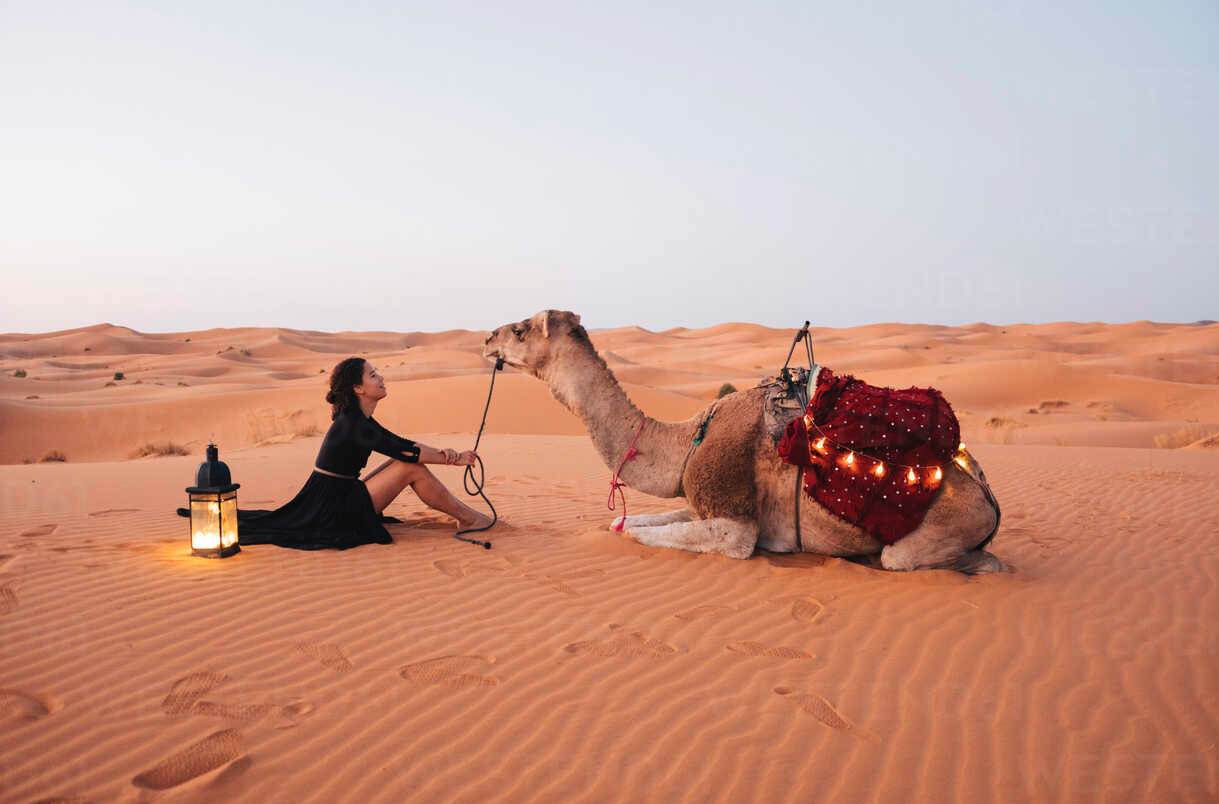

In [3]:
image = Image.open('assets/camel1.png').convert('RGB')
image

In [4]:
step = 'OBJ0=SEG(image=IMAGE)'

In [5]:
seg = Seg(device='cpu')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/transformers/models/maskformer/image_processing_maskformer.py:411: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/transformers/models/maskformer/image_processing_maskformer.py:418: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(


In [6]:
state = {
    'IMAGE': image
}

In [7]:
output, html = seg.execute(step, state)

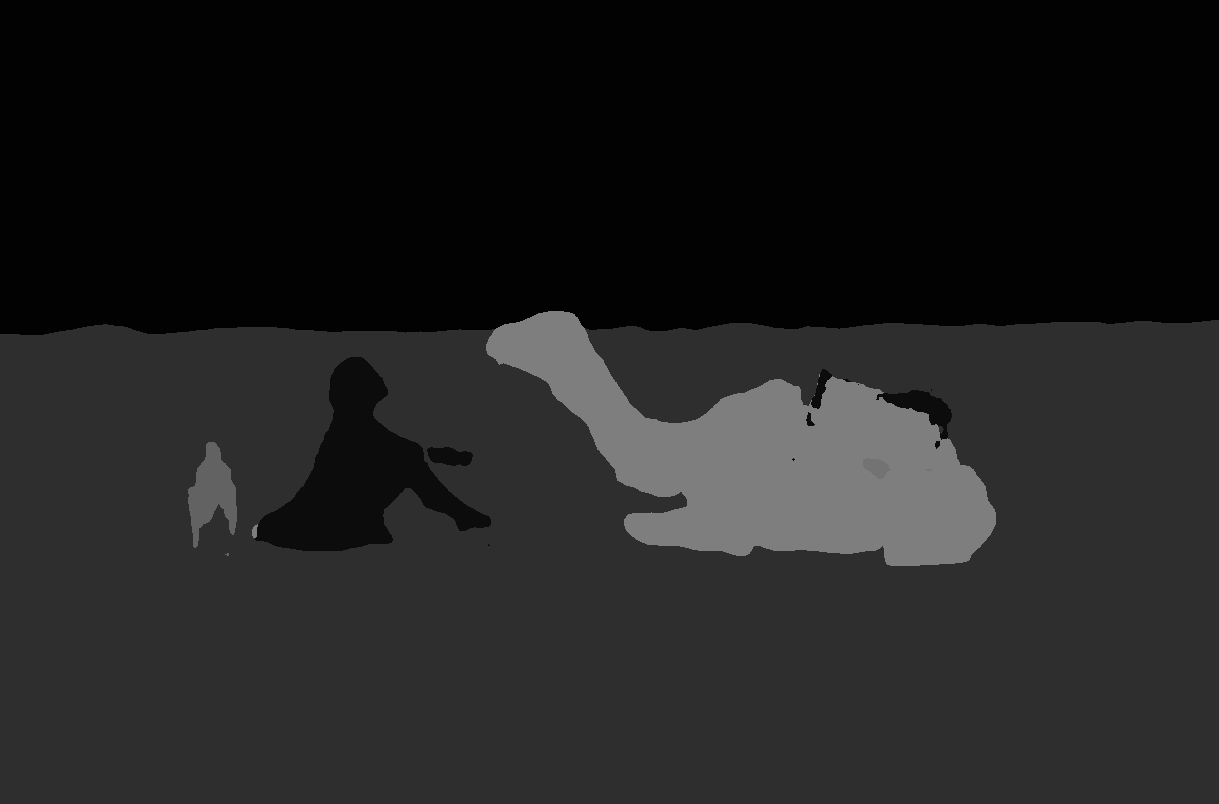

In [8]:
import numpy as np
Image.fromarray(output.astype(np.uint8))

In [9]:
np.unique(output)

array([  2,  12,  46,  98, 115, 126])

In [10]:
[seg.model.config.id2label[id_] for id_ in np.unique(output)]

['sky', 'person', 'sand', 'bottle', 'bag', 'animal']

In [11]:
state.keys()

dict_keys(['IMAGE', 'OBJ0'])

In [12]:
step2 = "OBJ1=SELECT(image=IMAGE,object=OBJ0,query='Camel,Woman,Bottle,Bag',category=None)"

In [13]:
select = Select(seg.model.config.id2label, seg.model.config.label2id)

In [14]:
output, html = select.execute(step2, state)

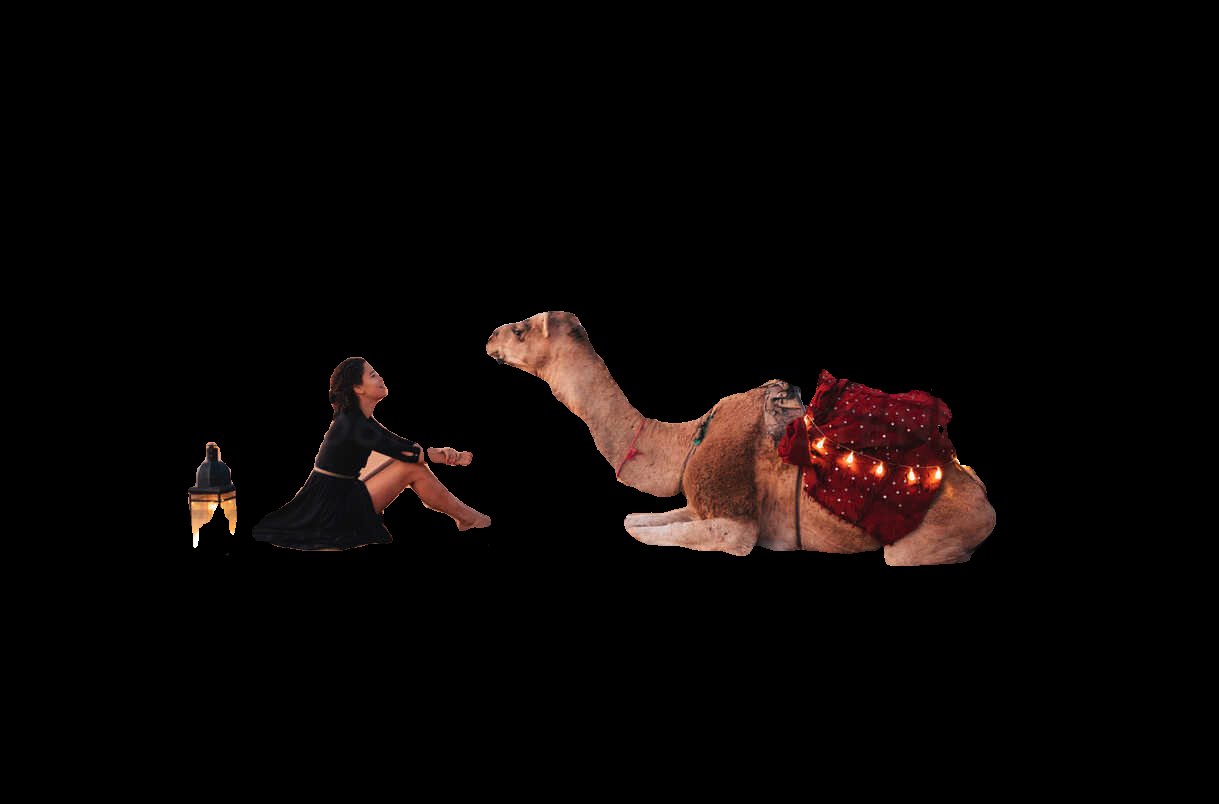

In [15]:
html['output']

In [16]:
step3 = "IMAGE0=BGBLUR(image=IMAGE,object=OBJ1)"

In [17]:
bgblur = BGBlur()

In [18]:
state.keys()

dict_keys(['IMAGE', 'OBJ0', 'OBJ1'])

In [19]:
output, html = bgblur.execute(step3, state)

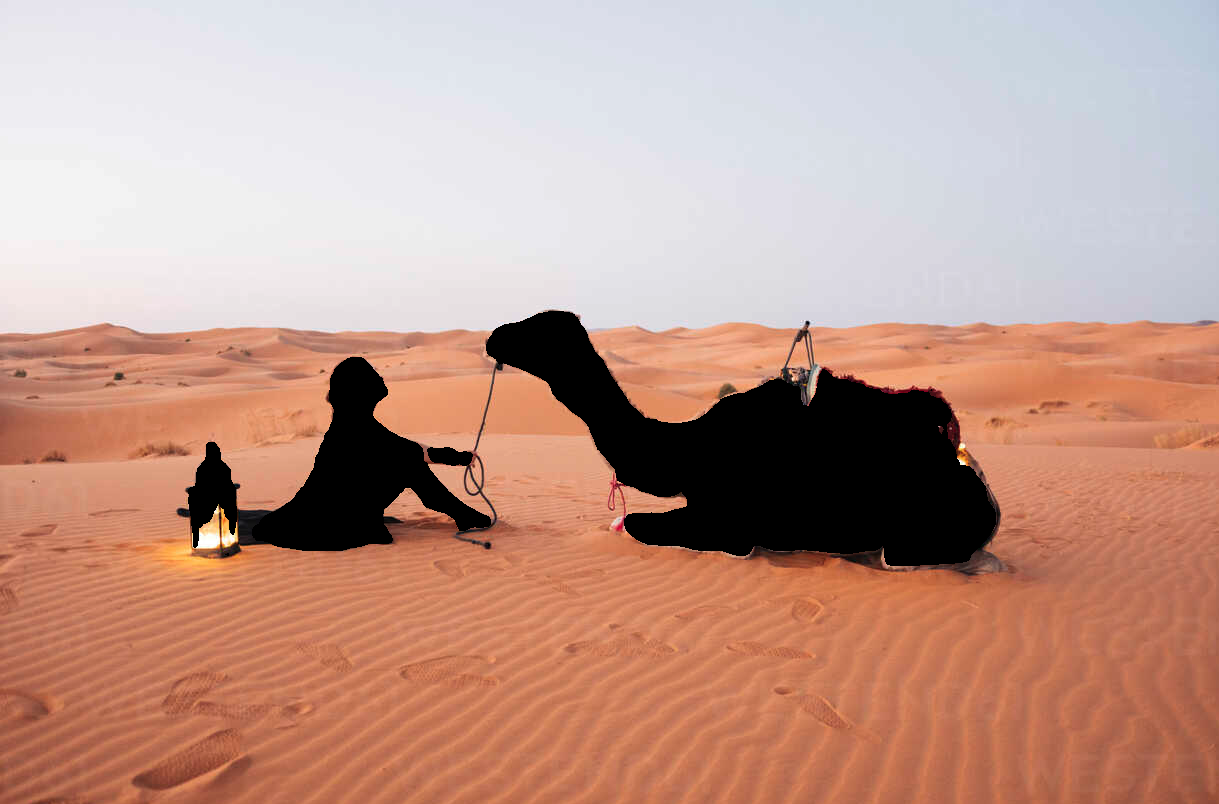

In [20]:
html['background']

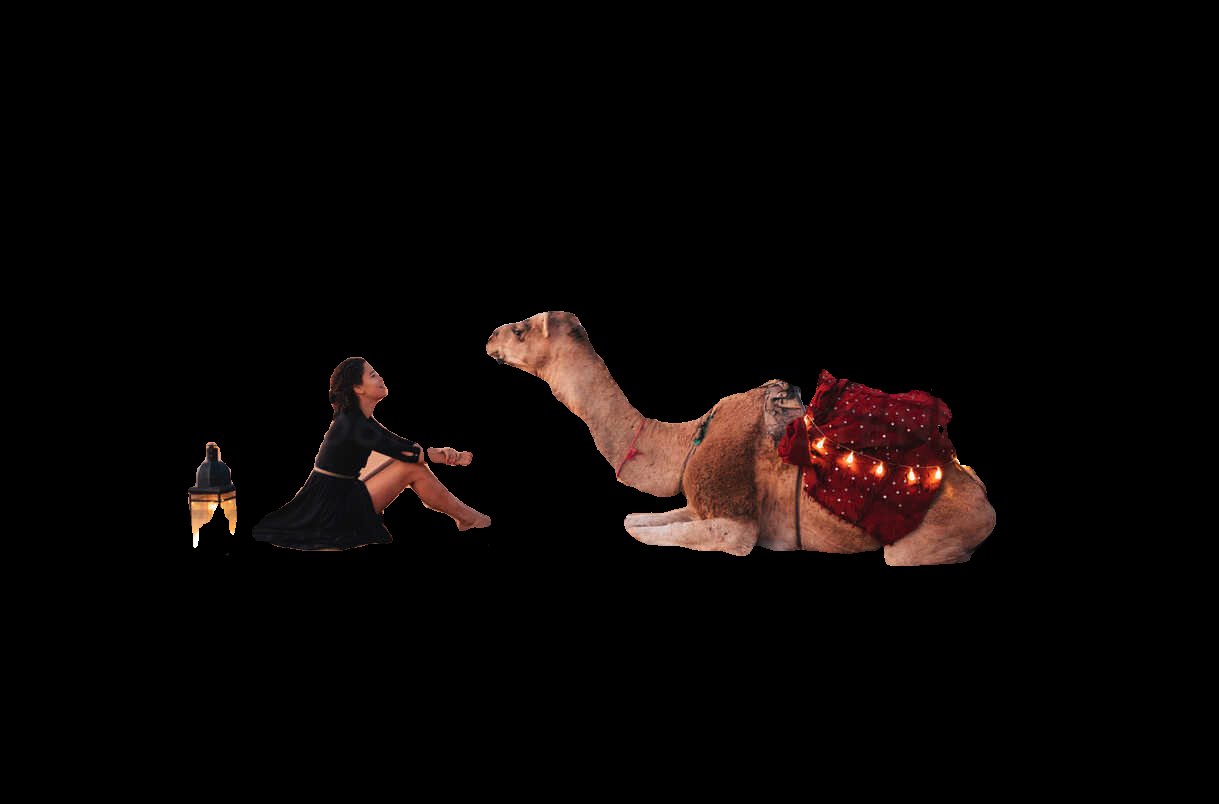

In [21]:
html['foreground']

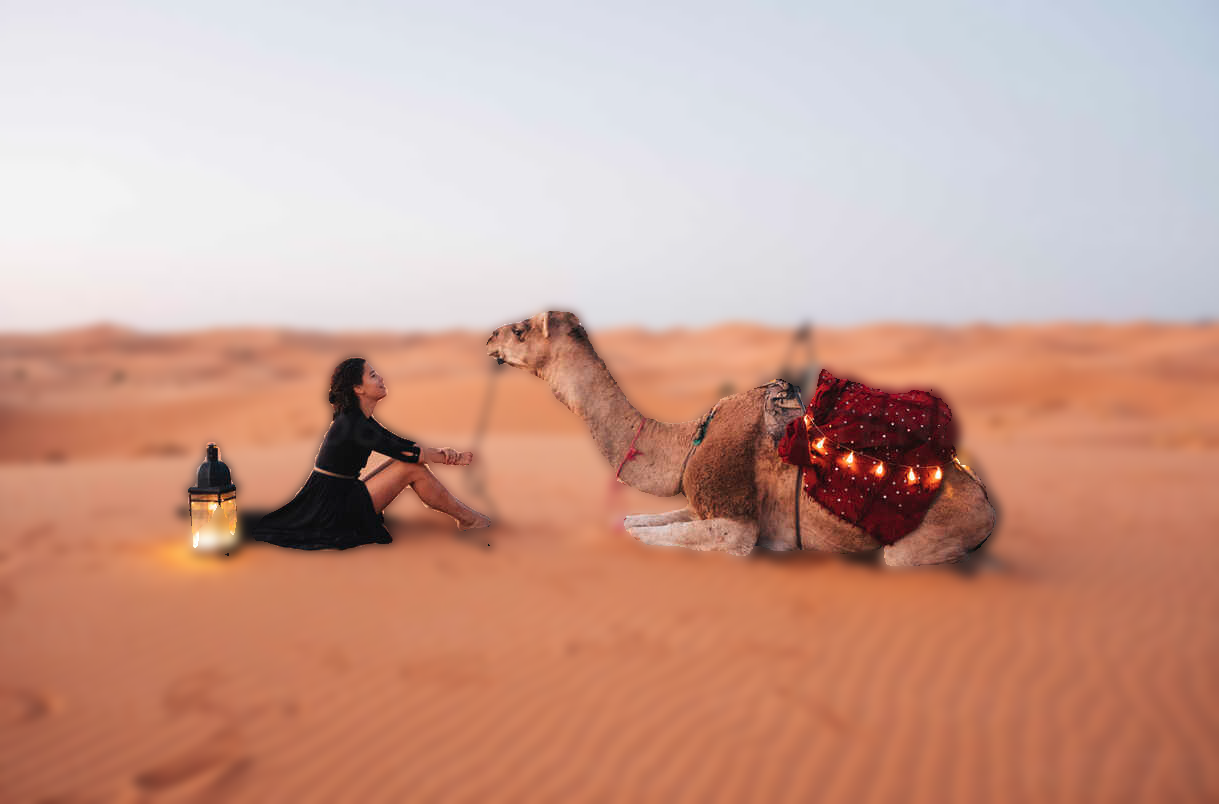

In [22]:
output

In [23]:
step4 = "FINAL_RESULT=RESULT(var=IMAGE0)"

In [24]:
result = Result()

In [25]:
result.execute(step4, state)

({'var': <PIL.Image.Image image mode=RGB size=1219x804>},
 {'var': <PIL.Image.Image image mode=RGB size=1219x804>})

In [26]:
state.keys()

dict_keys(['IMAGE', 'OBJ0', 'OBJ1', 'IMAGE0', 'FINAL_RESULT'])

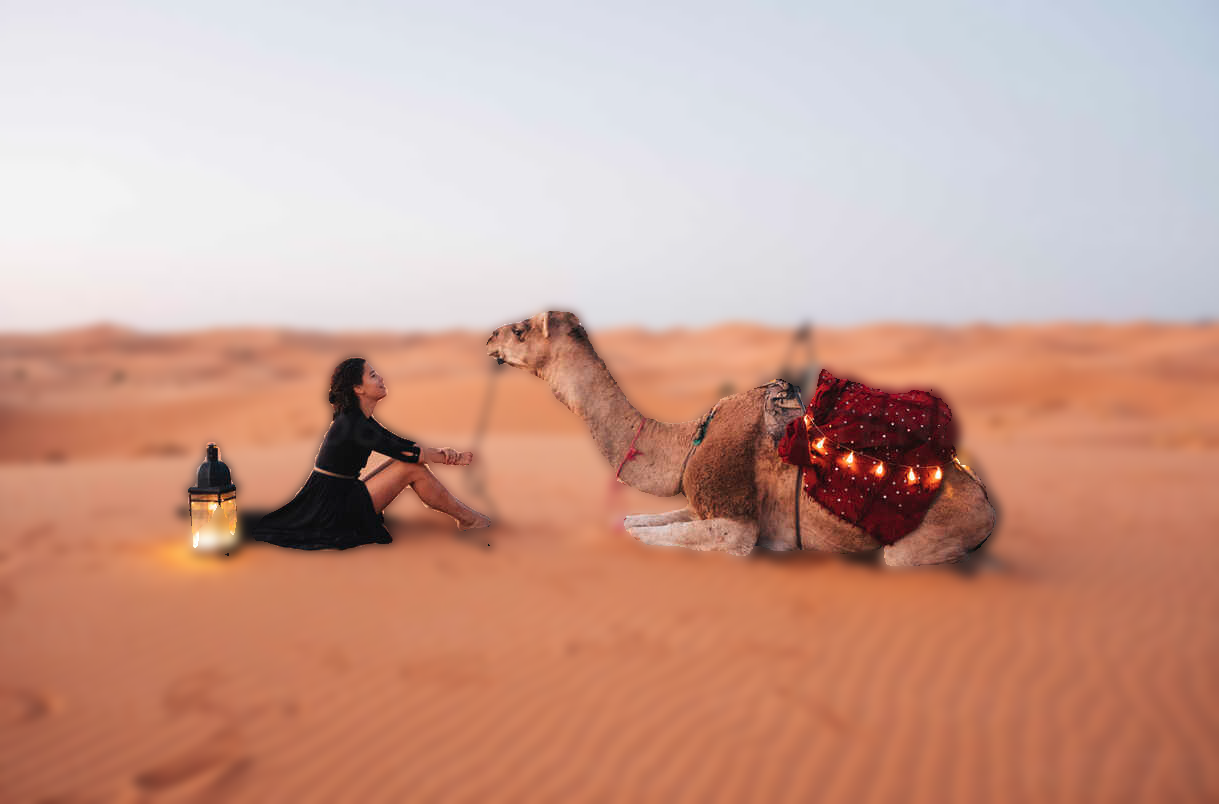

In [27]:
state['FINAL_RESULT']['var']